# Handwritten digit Recognition through Machine Learning

#### - _Abhishek Chhibber_
####  _ac100.in@gmail.com_


In [1]:
import sklearn
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn import tree

In [5]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

## Steps Involved:

* Read images of hand-written digits
* Convert images to monochrome
* Resize images to 16 X 16 pixels
* Convert the labels into a Numpy array
* Try different classifiers
* Use GridSearchCV to get the best parameters
* Predict the labels for testing dataset
* Create a Confusion Matrix and identify false positives and false negatives
* Calculate precision and recall

In [7]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", delimiter = r"\s+",
                header=None )

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(1593, 266)

In [10]:
X = pd.DataFrame(df)

In [11]:
X = X.drop([256,257,258,259,260,261,262,263,264,265], axis=1)

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
X.shape

(1593, 256)

In [14]:
label_df = pd.DataFrame(df.iloc[:,[256,257,258,259,260,261,262,263,264,265]])

In [15]:
label_df.shape

(1593, 10)

In [16]:
label_df.head()

,256,257,258,259,260,261,262,263,264,265
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [17]:
label_df.rename(columns={256:0, 257:1, 258:2, 259:3, 260:4, 261:5, 262:6, 263:7, 264:8, 265:9 }, inplace=True)

In [18]:
label_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [19]:
label_df['y'] = label_df.apply(lambda x: label_df.columns[x.argmax()], axis = 1)

In [20]:
label_df.head()

,0,1,2,3,4,5,6,7,8,9,y
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [21]:
label_df.tail()

,0,1,2,3,4,5,6,7,8,9,y
1588,0,0,0,0,0,0,0,0,0,1,9
1589,0,0,0,0,0,0,0,0,0,1,9
1590,0,0,0,0,0,0,0,0,0,1,9
1591,0,0,0,0,0,0,0,0,0,1,9
1592,0,0,0,0,0,0,0,0,0,1,9


In [22]:
y = label_df['y']

In [23]:
type(y)

pandas.core.series.Series

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)

In [25]:
X_train.shape

(1513, 256)

In [26]:
y_train.shape

(1513,)

In [27]:
X_test.shape

(80, 256)

In [28]:
y_test.shape

(80,)

## K Nearest Neighbors (KNN)

In [29]:
clf_knn = KNeighborsClassifier()

In [30]:
k_range = range (1,6)

In [31]:
knn_weight_options = ['uniform','distance']

In [32]:
knn_algorithm_options = ['ball_tree', 'kd_tree', 'brute']

In [33]:
knn_params = {'n_neighbors':k_range, 'weights':knn_weight_options, 'algorithm': knn_algorithm_options}

In [34]:
knn_grid = GridSearchCV(clf_knn, knn_params, cv=10, scoring='accuracy')

In [35]:
knn_grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 6), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
knn_grid.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91714, std: 0.02317, params: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.91714, std: 0.02317, params: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.88324, std: 0.02245, params: {'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.91525, std: 0.02164, params: {'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.90458, std: 0.02139, params: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.91525, std: 0.02211, params: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.90270, std: 0.02142, params: {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.91965, std: 0.01339, params: {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.90144, std: 0.02133, params: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.91525, std: 0.01767, params: {'al

In [37]:
knn_grid.best_params_

{'algorithm': 'brute', 'n_neighbors': 4, 'weights': 'distance'}

In [38]:
knn_grid.best_score_

0.92278719397363462

In [39]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

## Decision Trees

In [40]:
clf_dt= tree.DecisionTreeClassifier(random_state=10)

In [41]:
dt_splitter = ['best','random']

In [42]:
dt_criterion = ['gini', 'entropy']

In [43]:
dt_params = {'splitter':dt_splitter , 'criterion':dt_criterion}

In [44]:
dt_grid = GridSearchCV(clf_dt, dt_params, cv=10, scoring='accuracy')

In [45]:
dt_grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
dt_grid.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.75141, std: 0.02401, params: {'criterion': 'gini', 'splitter': 'best'},
 mean: 0.74639, std: 0.02973, params: {'criterion': 'gini', 'splitter': 'random'},
 mean: 0.75518, std: 0.02013, params: {'criterion': 'entropy', 'splitter': 'best'},
 mean: 0.75895, std: 0.02754, params: {'criterion': 'entropy', 'splitter': 'random'}]

In [47]:
dt_grid.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [48]:
dt_grid.best_score_

0.75894538606403017

In [49]:
dt_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='random')

## Final Model

In [50]:
clf_final = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [51]:
clf_final.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [52]:
y_pred = clf_final.predict(X_test)

In [53]:
print (metrics.accuracy_score(y_test,y_pred))

0.925


## Confusion Matrix

In [54]:
cm = confusion_matrix(y_test, y_pred)

In [55]:
cm

array([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 9, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 8, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 9, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 4, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 7]], dtype=int64)

Text(69,0.5,'Actual')

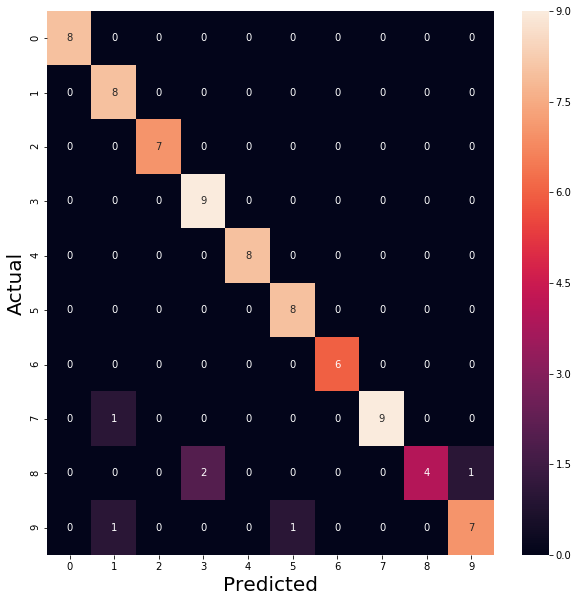

In [56]:
labels = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,10))

sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

## Precision and Recall

In [57]:
scr_clf_knn = precision_recall_fscore_support(y_test,y_pred, average='weighted')

In [58]:
print ("classifier's precision: "+str(scr_clf_knn[0]) )
print ("classifier's recall: "+str(scr_clf_knn[1]) )
print ("classifier's fbeta_score: "+str(scr_clf_knn[2]) )

classifier's precision: 0.934371843434
classifier's recall: 0.925
classifier's fbeta_score: 0.921461011039


In [59]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
787,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
y_test[:5]

599     0
787     9
47      2
1237    1
1069    6
Name: y, dtype: int64

In [61]:
type(y_test)

pandas.core.series.Series

In [62]:
y_test_df = y_test.to_frame()

In [63]:
y_test_df.head()

,y
599,0
787,9
47,2
1237,1
1069,6


In [64]:
y_test_df['y_pred'] = pd.Series(y_pred, index=y_test_df.index)

In [65]:
y_test_df.head()

,y,y_pred
599,0,0
787,9,9
47,2,2
1237,1,1
1069,6,6


In [66]:
y_test_df.index[y_test_df.y != y_test_df.y_pred]

Int64Index([1519, 149, 1153, 1158, 1562, 568], dtype='int64')

In [67]:
wrong_list = [1519, 149, 1153, 1158, 1562, 568]
y_test_df.ix[wrong_list]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,y,y_pred
1519,8,3
149,7,1
1153,8,9
1158,9,5
1562,9,1
568,8,3


In [68]:
def make_image (index_num):
    one_row = X.ix[index_num] # get the record from the X dataset
    one_values = one_row.values # convert the series to a numpy array
        
    i = 16 # values in one array
    j = 0
    img = np.array(one_values[:16])
    while i <= len(one_values):
        temp_array = np.array(one_values[j:i])
        img = np.vstack((img,temp_array))
        j = i   
        i += 16

    # Plot image
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation="nearest")
    plt.show()
    
    print ("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
    
    print (y_test_df.ix[index_num]) # will work only for index numbers in the testing datasets
    return

## Wrongly predicted digits

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


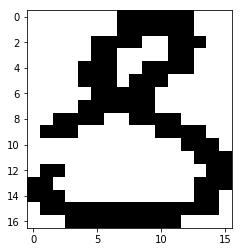

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         8
y_pred    3
Name: 1519, dtype: int64


In [69]:
make_image(1519)

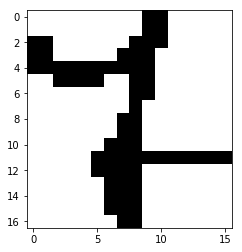

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         7
y_pred    1
Name: 149, dtype: int64


In [70]:
make_image(149)

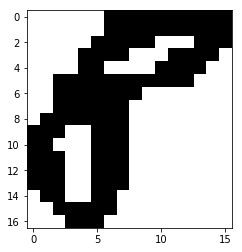

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         8
y_pred    9
Name: 1153, dtype: int64


In [71]:
make_image(1153)

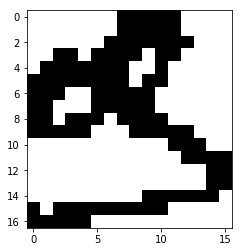

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         9
y_pred    5
Name: 1158, dtype: int64


In [72]:
make_image(1158)

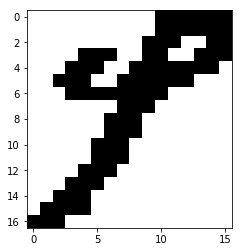

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         9
y_pred    1
Name: 1562, dtype: int64


In [73]:
make_image(1562)

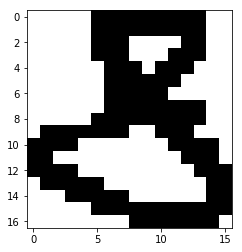

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         8
y_pred    3
Name: 568, dtype: int64


In [74]:
make_image(568)

## Correctly predicted digits

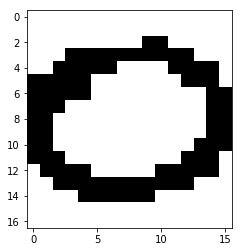

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         0
y_pred    0
Name: 599, dtype: int64


In [75]:
make_image(599)

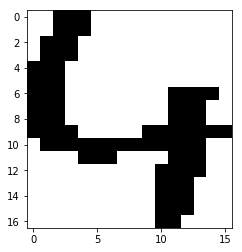

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         4
y_pred    4
Name: 977, dtype: int64


In [76]:
make_image(977)

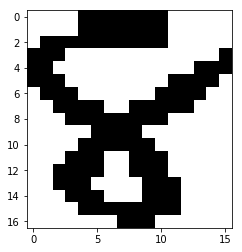

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         8
y_pred    8
Name: 362, dtype: int64


In [77]:
make_image(362)